<a href="https://colab.research.google.com/github/vishnuvryeruva/CMPE-256/blob/main/CMPE256_twitter_sentiment_analysis_Covid19_vaccine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Public opinion and sentiment analysis on the COVID-19 vaccine using Twitter data

* **Team**: Chirp
* **Team Members**: Ashika Anand Babu, Subarna Chowdhury Soma, Vishnu Vardhan Reddy Yeruva

# Summary of Analysis
1. It's visible that the dataset has covid vaccine related tweets from 12th December ,2020

# Connection With Drive

In [ ]:
#cannot share in github right now as the repository is private.
from google.colab import drive
drive.mount('/content/gdrive')
# Mount Google Drive
# from google.colab import drive
# import pandas as pd
# drive.mount('/content/drive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/CMPE256_Project/Data"

In [ ]:
%cd /content/gdrive/My Drive/CMPE256_Project/Data/

/content/gdrive/My Drive/CMPE256_Project/Data


In [ ]:
! kaggle datasets download -d gpreda/all-covid19-vaccines-tweets

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /content/gdrive/My Drive/CMPE256_Project/Data. Or use the environment method.


In [ ]:
!unzip \*.zip  && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


# Import packages

In [ ]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, dates
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import string, collections, unicodedata
import missingno as msno

# Import NLP libraries
import re
import nltk
import json
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import subjectivity
%matplotlib inline 

# Import models, evaluator libraries
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

# Import location, time libraries
import os
import time
from datetime import datetime, timedelta

%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
!pip install langdetect


In [ ]:
!pip install geopandas

In [ ]:
pip install -U textblob

In [ ]:
#Working with Data/CSV of movies with Panda and Numpy libraries
import pandas as pd
import numpy as np

from pandas import Series, DataFrame
pd.options.mode.chained_assignment = None



In [ ]:
from textblob import TextBlob

b = TextBlob('So excited to get my vaccine!')
print(b.sentiment)

Sentiment(polarity=0.46875, subjectivity=0.75)


# Twitter Data: Load Data

* https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets
* https://www.kaggle.com/gpreda/covid-world-vaccination-progress


In [ ]:
#Reading Movies CSV and Loading our data frame
# Read in tweets referencing Joe Biden and Donald Trump
df_vacc_tweet = pd.read_csv('./vaccination_all_tweets.csv', lineterminator='\n', parse_dates=True)




In [ ]:
df_vacc_tweet.shape

(220844, 16)

In [ ]:

df_vacc_tweet.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet\r'],
      dtype='object')

In [ ]:
df_vacc_tweet.sort_values(by='retweets', ascending=False)[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

,text,date,user_name,user_location,hashtags,favorites,retweets
68358,"RDIF, Laboratorios Richmond launched production of #SputnikV in Argentina, the first country in Latin America to ma… https://t.co/oEMaUwVR92",2021-04-20 15:30:23,Sputnik V,"Moscow, Russia",['SputnikV'],25724,11288
46053,Why we need Two Doses of mRNA Vaccine 💉 #vaccines #COVID19 #Pfizer #moderna #VaccinesSaveLives #vaccinated https://t.co/RFRmPAyubD,2021-04-01 21:17:51,hotvickkrishna,"Manhattan, NY","['vaccines', 'COVID19', 'Pfizer', 'moderna', 'VaccinesSaveLives', 'vaccinated']",19622,7695
54674,We completely reject the false and malicious reporting by @CNBCTV18News on COVAXIN® supplies to international marke… https://t.co/OXgKYg2YLL,2021-04-08 15:17:19,BharatBiotech,"Hyderabad, India",NaN,15944,6018
66822,ICMR study shows #COVAXIN neutralises against multiple variants of SARS-CoV-2 and effectively neutralises the doubl… https://t.co/0IYwr0KymJ,2021-04-21 06:54:05,ICMR,New Delhi,['COVAXIN'],11995,4851
68306,Argentine Health Minister @carlavizzotti and Presidential Adviser @cecilianicolini celebrate the production of… https://t.co/E9cPPA5Twf,2021-04-20 19:54:29,Sputnik V,"Moscow, Russia",NaN,15148,4105
76306,#Argentina's actor breaks into a live TV to show his #SputnikV vaccination certificate &amp; express his gratitude. \n\nT… https://t.co/N1NwjkD83y,2021-05-19 15:01:14,Sputnik V,"Moscow, Russia","['Argentina', 'SputnikV']",14412,2550
17118,"Got my jab. For the curious, it was #Covaxin. \n\nFelt secure, will travel safely. https://t.co/8PL7PZMEsf",2021-03-01 12:29:37,Dr. S. Jaishankar,"New Delhi, India",['Covaxin'],22815,2360
53045,I see it’s going around with signature cropped....so here is the original:) #covid 19 #vaccine #pfizer #moderna… https://t.co/eoqT74V78A,2021-04-12 21:58:27,dawnymock,Fredericton New Brunswick,"['covid', 'vaccine', 'pfizer', 'moderna']",10175,2299
75232,It’s 72 hours since @BharatBiotech announced that it will transfer production details to whoever wants to produce… https://t.co/ixrqS87R6X,2021-05-17 05:11:52,B L Santhosh,"New Delhi, India",NaN,7030,2294
7126,"New research published in Microbiology &amp; Infectious Diseases, immunologist J. Bart Classen warns #mRNA technology u… https://t.co/OWUTf5ShHO",2021-02-10 15:11:23,Robert F. Kennedy Jr,"Los Angles, California",['mRNA'],3090,2247


In [ ]:
df_vacc_tweet.sort_values(by=['date', 'favorites'], ascending=[True, False])[['text', 'date', 'user_name', 'user_location', 'hashtags', 'favorites', 'retweets']].head(n=10)

,text,date,user_name,user_location,hashtags,favorites,retweets
44,#FDA authorizes #PfizerBioNTech #coronavirus vaccine for emergency use\nhttps://t.co/VZ6bDPbbPG,2020-12-12 11:55:28,Daily News Egypt,Egypt,"['FDA', 'PfizerBioNTech', 'coronavirus']",1,1
43,Trump announces #vaccine rollout 'in less than 24 hours'\n\nThe first Americans will be vaccinated against… https://t.co/6379SZjNQi,2020-12-12 11:59:10,City A.M.,"London, England",['vaccine'],2,0
42,#CovidVaccine #Pfizer-BioNTech COVID-19 #PfizerBioNTech #COVID19 #CapeTown https://t.co/uCpwv0S4nl,2020-12-12 12:12:35,mystic,NaN,"['CovidVaccine', 'Pfizer', 'PfizerBioNTech', 'COVID19', 'CapeTown']",1,0
41,FACT SHEET FOR RECIPIENTS AND CAREGIVERS\n\n#PfizerBioNTech \n#CovidVaccine \n\nhttps://t.co/V0mn08VTwj,2020-12-12 12:16:14,KHuntson,USA🇺🇸,"['PfizerBioNTech', 'CovidVaccine']",0,0
40,@mirekR9 @sputnikvaccine @AstraZeneca it's the only one which doesn't have any side effects \n\nthe #PfizerBioNTech a… https://t.co/IWELAATAmd,2020-12-12 12:16:27,"Party politics isn't working for anyone, anywhere","Wales, United Kingdom",['PfizerBioNTech'],0,0
39,@mirekR9 @sputnikvaccine @AstraZeneca check out table 23 of this and other tables too because it took the penny a w… https://t.co/5r6ibs8Jm8,2020-12-12 12:19:40,"Party politics isn't working for anyone, anywhere","Wales, United Kingdom",NaN,0,0
38,FACT SHEET FOR HEALTHCARE PROVIDERS ADMINISTERING VACCINE\n\n#PfizerBioNTech \n#CovidVaccine \n\nhttps://t.co/xRaOiACZSD,2020-12-12 12:19:56,KHuntson,USA🇺🇸,"['PfizerBioNTech', 'CovidVaccine']",0,0
37,"Ladies and Gentlemen, now we have #CovidVaccine experts in each and every household of #Pakistan #PfizerBioNTech #oxfordvaccine 🤦‍♂️",2020-12-12 12:20:30,Farooq Anees,"دبي, الامارات العربية المتحدة","['CovidVaccine', 'Pakistan', 'PfizerBioNTech', 'oxfordvaccine']",0,0
36,"The #FDA finally issues #EUA now comes the problem transporting this #PfizerBioNTech vaccine, needs to be kept at -… https://t.co/NvaGyoo2yD",2020-12-12 12:26:34,John Berry,NaN,"['FDA', 'EUA', 'PfizerBioNTech']",0,0
35,An immigrant Muslim couple find the COVID-19 Vaccine. \n\n#CovidVaccine #PfizerBioNTech #Pfizervaccine #PfizerProud,2020-12-12 12:42:31,Shahjhan Malik | #WearAMask,"Nottinghamshire, England","['CovidVaccine', 'PfizerBioNTech', 'Pfizervaccine', 'PfizerProud']",37,2


In [ ]:
# df_vacc_tweet['polarity'] = df_vacc_tweet['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
# df_vacc_tweet['subjectivity'] = df_vacc_tweet['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df_vacc_tweet.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet\r
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False\r
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False\r
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False\r
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False\r
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False\r


# Understanding & Preprocessing Data

## Data Info

In [ ]:
df_vacc_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220844 entries, 0 to 220843
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                220844 non-null  int64 
 1   user_name         220843 non-null  object
 2   user_location     156144 non-null  object
 3   user_description  204756 non-null  object
 4   user_created      220844 non-null  object
 5   user_followers    220844 non-null  int64 
 6   user_friends      220844 non-null  int64 
 7   user_favourites   220844 non-null  int64 
 8   user_verified     220844 non-null  bool  
 9   date              220844 non-null  object
 10  text              220844 non-null  object
 11  hashtags          172469 non-null  object
 12  source            220725 non-null  object
 13  retweets          220844 non-null  int64 
 14  favorites         220844 non-null  int64 
       220844 non-null  object
dtypes: bool(1), int64(6), object(9)
memory usage: 25.5+ MB

In [ ]:
df_vacc_tweet.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.208440e+05,2.208440e+05,220844.000000,2.208440e+05,220844.000000,220844.000000
mean,1.405761e+18,9.698201e+04,986.627719,1.205145e+04,2.429271,10.573672
std,2.785311e+16,8.433785e+05,5330.545659,3.892971e+04,44.644301,165.632989
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.381574e+18,5.600000e+01,26.000000,5.700000e+01,0.000000,0.000000
50%,1.407441e+18,3.330000e+02,229.000000,9.885000e+02,0.000000,0.000000
75%,1.426169e+18,1.527000e+03,793.000000,7.275000e+03,1.000000,2.000000
max,1.458491e+18,1.628317e+07,582461.000000,1.299600e+06,11288.000000,25724.000000


## Missing Data Check

- We can see that there is a lot of missing data in user_location, description,sources

In [ ]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
missing_data(df_vacc_tweet)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet\r
Total,0,1,64700,16088,0,0,0,0,0,0,0,48375,119,0,0,0
Percent,0,0.000452808,29.2967,7.28478,0,0,0,0,0,0,0,21.9046,0.0538842,0,0,0
Types,int64,object,object,object,object,int64,int64,int64,bool,object,object,object,object,int64,int64,object


In [ ]:
df_vacc_tweet.isna().sum()

id                      0
user_name               1
user_location       64700
user_description    16088
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            48375
source                119
retweets                0
favorites               0
is_retweet\r            0
dtype: int64

## Unique Values

In [ ]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [ ]:
unique_values(df_vacc_tweet)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet\r
Total,220844,220843,156144,204756,220844,220844,220844,220844,220844,220844,220844,172469,220725,220844,220844,220844
Uniques,220844,83558,24953,81928,84777,21894,8078,37867,2,214800,219031,58468,369,443,975,1


## Most Frequent Values

In [ ]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [ ]:
most_frequent_values(df_vacc_tweet)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet\r
Total,220844,220843,156144,204756,220844,220844,220844,220844,220844,220844,220844,172469,220725,220844,220844,220844
Most frequent item,1424773548946558977,CoWIN Blore 18-44,"Bengaluru, India","Get instant alerts for Free/Paid slots in BBMP, Bangalore Urban centers\n\nhttps://t.co/Vh4GH7Bb21",2021-06-29 09:33:13,24,0,0,False,2021-06-30 04:30:00,#COVAXIN vaccine approved for children aged 2 - 18 ... Another milestone in handling #COVID19 ... Well done scientists .,"['COVAXIN', 'BBMP']",Twitter for Android,0,0,False\r
Frequence,1,12210,18940,12185,12210,3681,28954,11242,202139,6,18,11113,57084,165595,115438,220844
Percent from total,0,5.529,12.13,5.951,5.529,1.667,13.111,5.09,91.53,0.003,0.008,6.443,25.862,74.983,52.271,100


## Converting date column to date format

In [ ]:

df_vacc_tweet['date_new'] = pd.to_datetime(df_vacc_tweet['date']).dt.date  #converting date column to date format
df_vacc_tweet.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet\r,date_new
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False\r,2020-12-20
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False\r,2020-12-13
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False\r,2020-12-12
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False\r,2020-12-12
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False\r,2020-12-12


## Dropping Duplicate Tweets

In [ ]:
df_vacc_tweet=df_vacc_tweet.drop_duplicates('text')             
df_vacc_tweet.shape

(219031, 17)

In [ ]:
df_vacc_tweet.source.value_counts()

Twitter for Android    56921
Twitter Web App        54965
Twitter for iPhone     47219
CowinAlertsBot         11276
cowin_vaccine_app      10203
                       ...  
EIN Presswire              1
Sharpspring                1
Weebly App                 1
Tweepi                     1
Senti125                   1
Name: source, Length: 369, dtype: int64

## Date: Number of days considered

In [ ]:
len(df_vacc_tweet['date'].unique())  

213364

In [ ]:
df_vacc_tweet.sort_values(by=['date'], ascending=[True]).head(2)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet\r,date_new
44,1337727767551553536,Daily News Egypt,Egypt,Egypt's Only Daily Independent Newspaper in English,2009-04-26 07:56:24,278080,116,765,True,2020-12-12 11:55:28,#FDA authorizes #PfizerBioNTech #coronavirus vaccine for emergency use\nhttps://t.co/VZ6bDPbbPG,"['FDA', 'PfizerBioNTech', 'coronavirus']",Twitter Web App,1,1,False\r,2020-12-12
43,1337728701820268544,City A.M.,"London, England","London's business newspaper - News, Opinion, and Analysis. For all distribution queries, see @CityAMDist.",2009-06-09 13:53:06,66224,603,771,True,2020-12-12 11:59:10,Trump announces #vaccine rollout 'in less than 24 hours'\n\nThe first Americans will be vaccinated against… https://t.co/6379SZjNQi,['vaccine'],Twitter Web App,0,2,False\r,2020-12-12


## Dropping Unnecessary Columns- will decide later

In [ ]:
# data1 = df_vacc_tweet.drop(columns={"id","user_name","user_description","user_created","user_followers",\
#                    "user_friends","user_favourites","user_verified","hashtags","source","retweets","favorites","is_retweet\r"},inplace=True)
# # dropping unnecessary 

## Set Data Max Width

In [ ]:
pd.set_option('display.max_colwidth', 700)
df_vacc_tweet.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet\r,date_new
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False\r,2020-12-20
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False\r,2020-12-13
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False\r,2020-12-12
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False\r,2020-12-12
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False\r,2020-12-12


# Visualize Data Distribution

## Visualizing Tweet Platform-wise Distribution 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

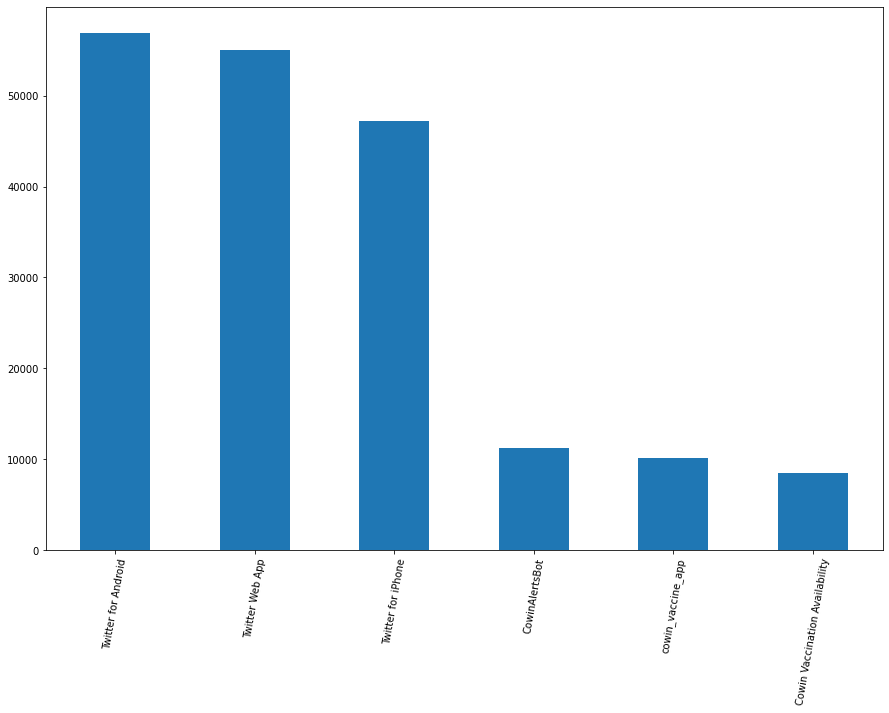

In [ ]:

plt.figure(figsize=(15,10))
df_vacc_tweet['source'].value_counts().nlargest(6).plot(kind='bar')
plt.xticks(rotation=80)

## User Name

In [ ]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129417 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127757 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27784 missing from current font.
  font.set_text(s, 0.0, flags=fl

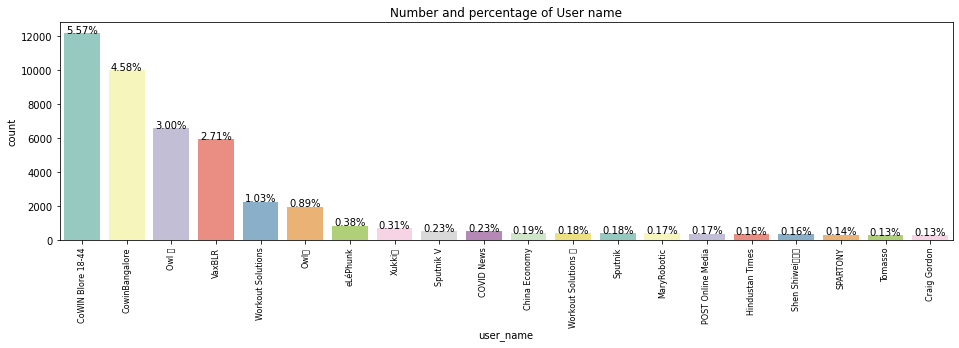

In [ ]:
plot_count("user_name", "User name", df_vacc_tweet,4)

## User Location

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


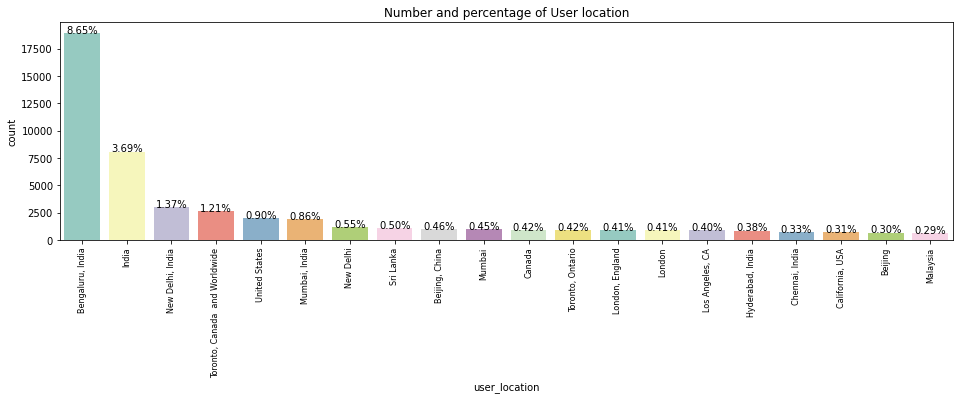

In [ ]:
plot_count("user_location", "User location", df_vacc_tweet,4)

## Tweet Source

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


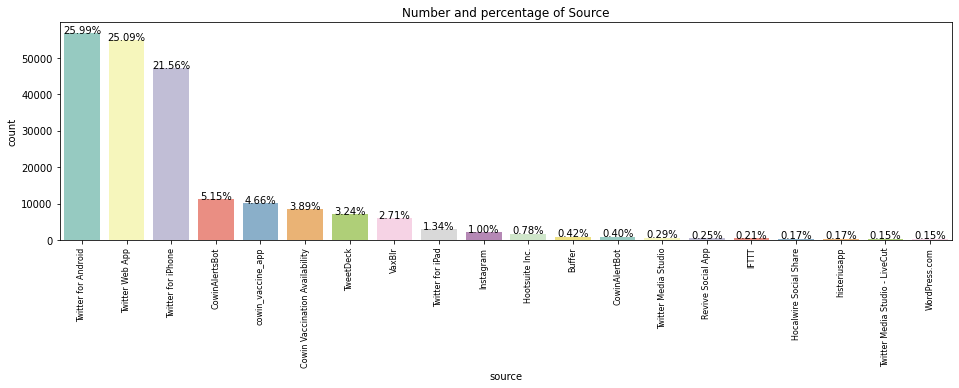

In [ ]:
plot_count("source", "Source", df_vacc_tweet,4)

## Visulizing Tweet Count vs Location

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

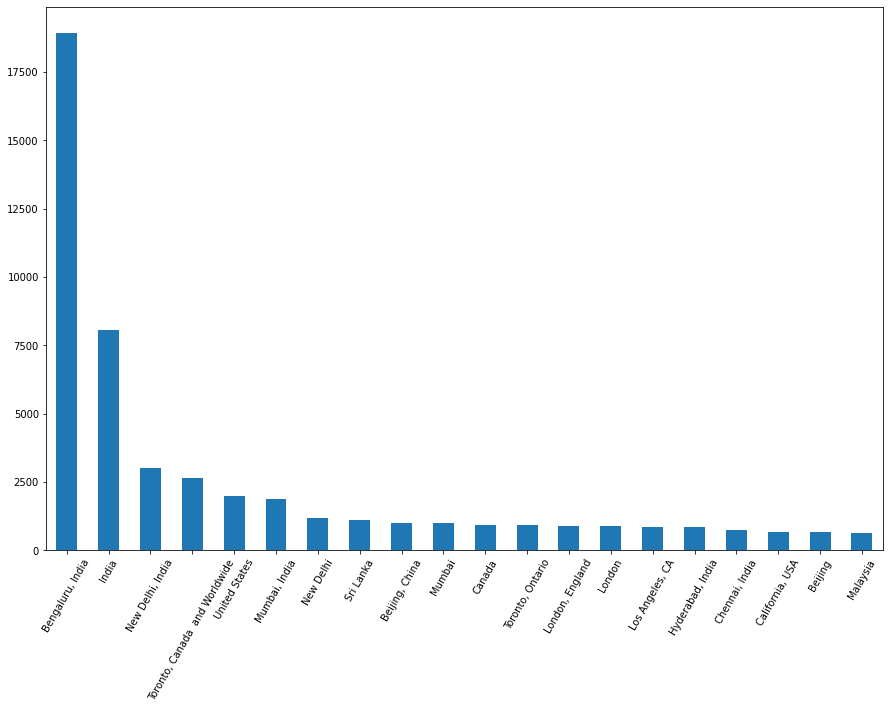

In [ ]:
  
plt.figure(figsize=(15,10))
df_vacc_tweet['user_location'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation=60)

## Text WordClouds

In [ ]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')

In [ ]:
df_vacc_tweet['user_location'].unique()

array(['La Crescenta-Montrose, CA', 'San Francisco, CA', 'Your Bed', ...,
       'Camarunggayan, Aurora Isabela', 'San Carlos,Cojedes,Venezuela',
       'Laoag City'], dtype=object)

### Prevalent words in tweets

#### 1. All

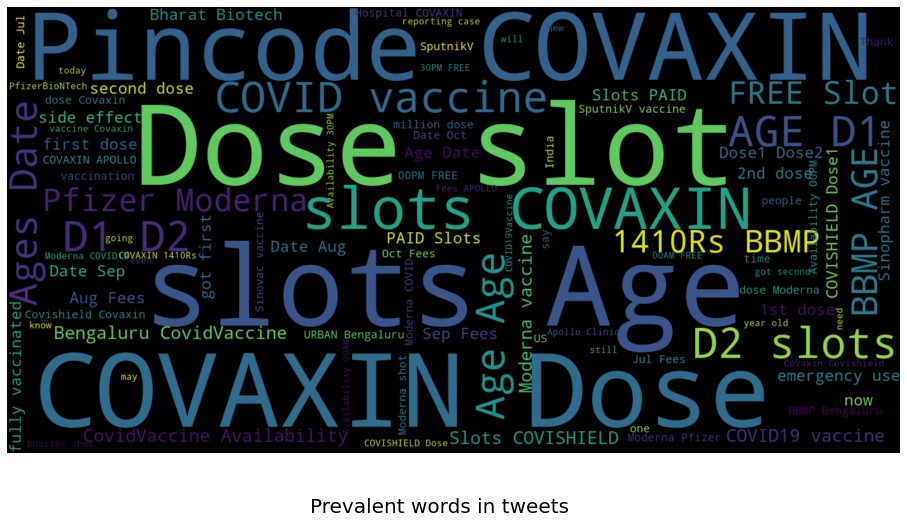

In [ ]:
show_wordcloud(df_vacc_tweet['text'], title = 'Prevalent words in tweets')

#### 2. USA

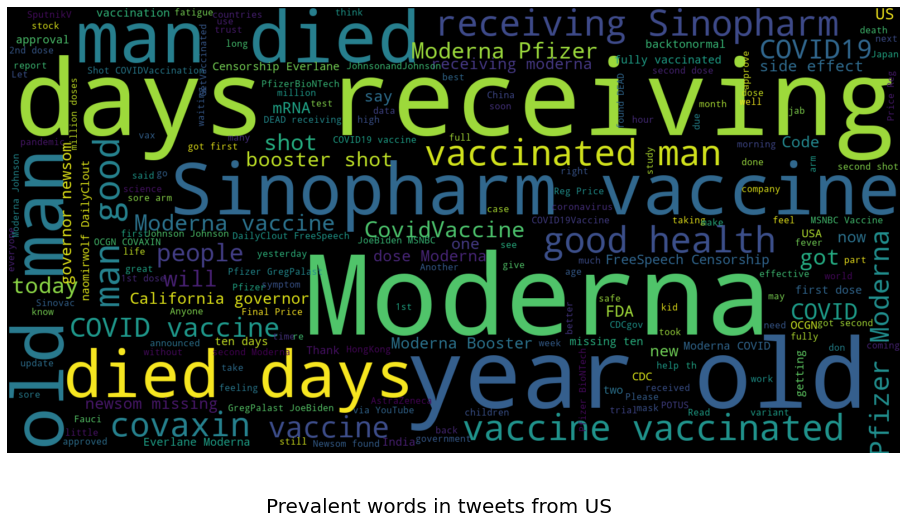

In [ ]:
us_df = df_vacc_tweet.loc[df_vacc_tweet.user_location=="United States"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from US')

#### 3. California

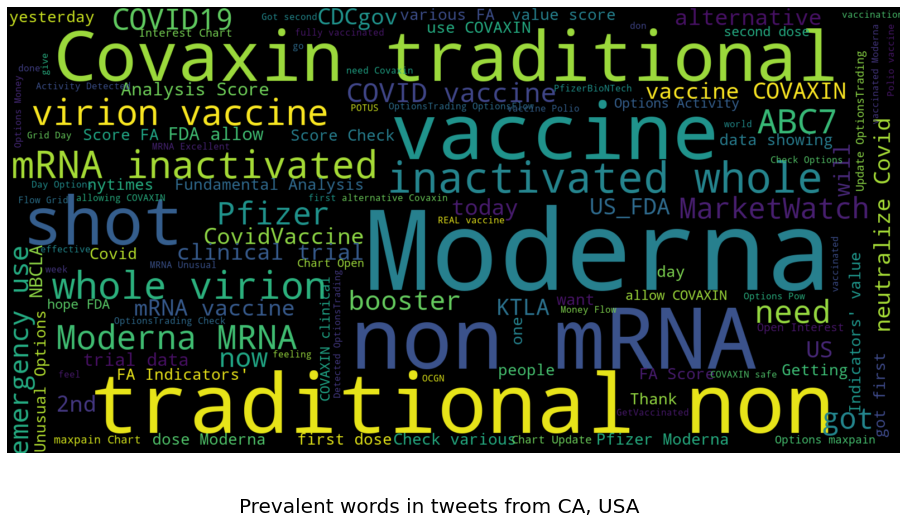

In [ ]:
ca_df = df_vacc_tweet.loc[df_vacc_tweet.user_location=="California, USA"]
show_wordcloud(ca_df['text'], title = 'Prevalent words in tweets from CA, USA')

#### 4. UK

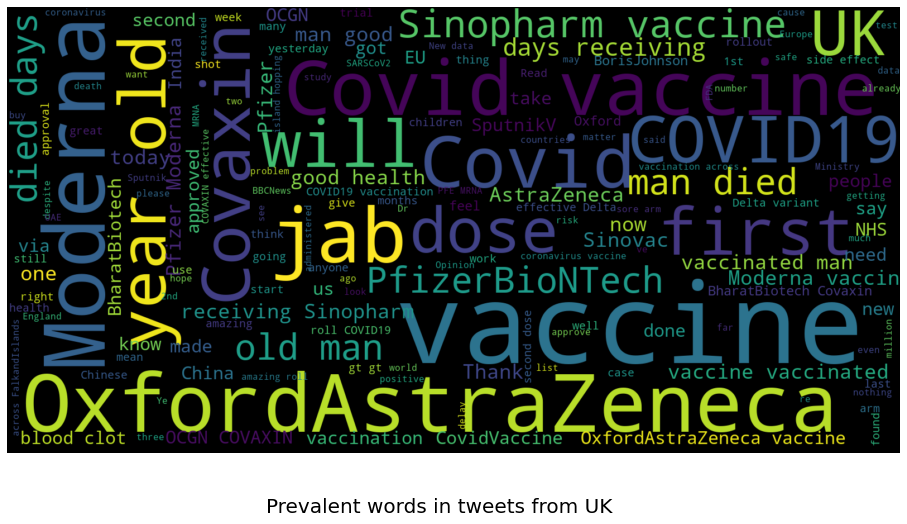

In [ ]:
uk_df = df_vacc_tweet.loc[df_vacc_tweet.user_location=="United Kingdom"]
show_wordcloud(uk_df['text'], title = 'Prevalent words in tweets from UK')

#### 5. Canada

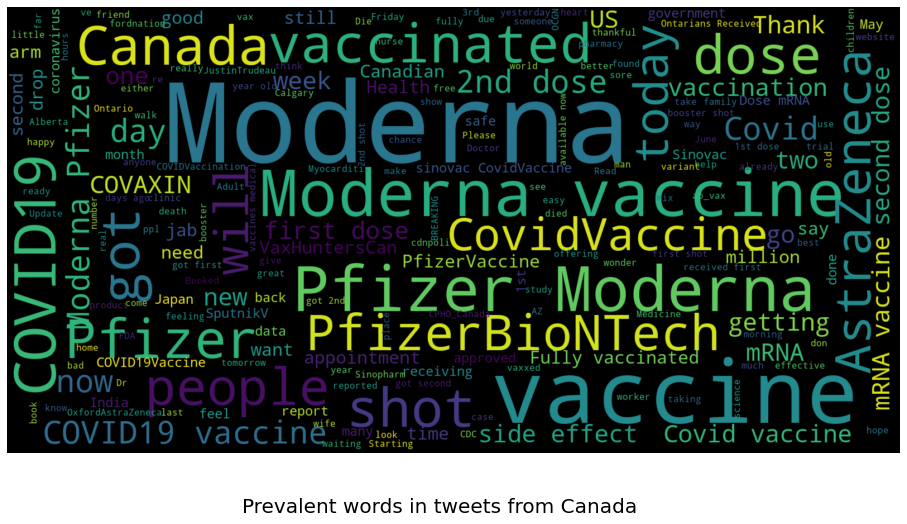

In [ ]:
ca_df = df_vacc_tweet.loc[df_vacc_tweet.user_location=="Canada"]
show_wordcloud(ca_df['text'], title = 'Prevalent words in tweets from Canada')

#### 6. India

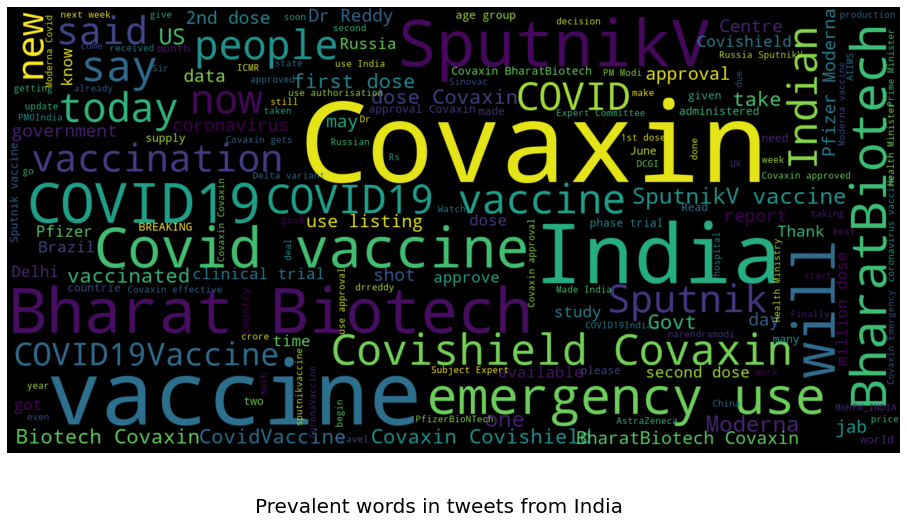

In [ ]:
india_df = df_vacc_tweet.loc[df_vacc_tweet.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

#### 7. Bangladesh

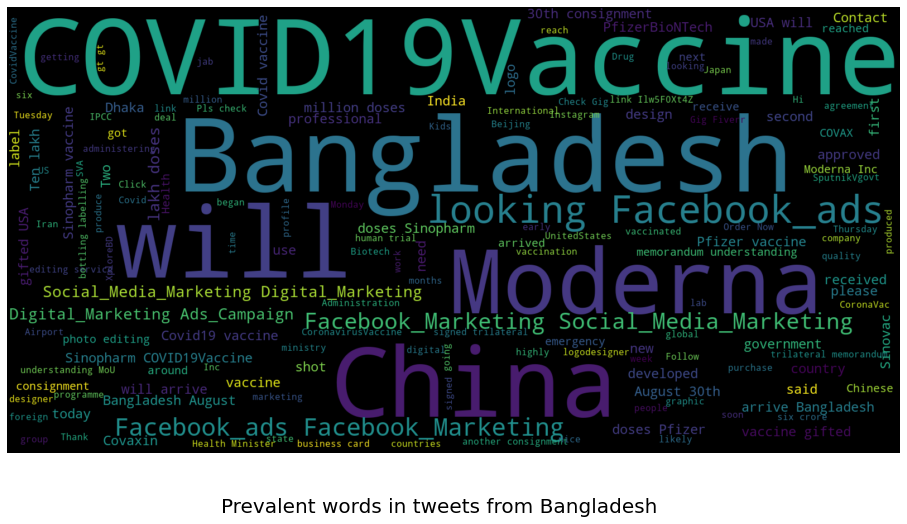

In [ ]:
bd_df = df_vacc_tweet.loc[df_vacc_tweet.user_location=="Bangladesh"]
show_wordcloud(bd_df['text'], title = 'Prevalent words in tweets from Bangladesh')

# Hashtag Analysis

In [ ]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


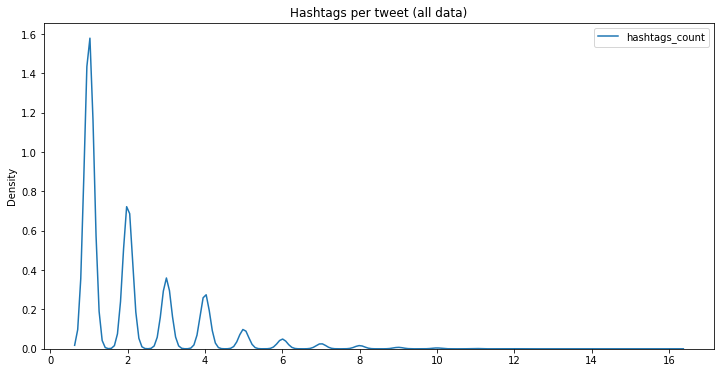

In [ ]:
df_vacc_tweet['hashtags'] = df_vacc_tweet['hashtags'].replace(np.nan, "['None']", regex=True)
df_vacc_tweet['hashtags'] = df_vacc_tweet['hashtags'].apply(lambda x: x.replace('\\N',''))
df_vacc_tweet['hashtags_count'] = df_vacc_tweet['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', df_vacc_tweet)

In [ ]:
df_vacc_tweet['hashtags_individual'] = df_vacc_tweet['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(df_vacc_tweet['hashtags_individual'])))
print(f"There are totally: {len(all_hashtags)}")

There are totally: 41700


In [ ]:
df_vacc_tweet['hashtags_individual'].head()

0                                                                          [['PfizerBioNTech']]
1                                                                                    [['None']]
2    [['coronavirus',  'SputnikV',  'AstraZeneca',  'PfizerBioNTech',  'Moderna',  'Covid_19']]
3                                                                                    [['None']]
4                                             [['whereareallthesickpeople',  'PfizerBioNTech']]
Name: hashtags_individual, dtype: object

# Date and Time Feature Analysis

- Time Variation

In [ ]:
tweets_df = df_vacc_tweet
tweets_df['datedt'] = pd.to_datetime(tweets_df['date'])

In [ ]:
tweets_df['year'] = tweets_df['datedt'].dt.year
tweets_df['month'] = tweets_df['datedt'].dt.month
tweets_df['day'] = tweets_df['datedt'].dt.day
tweets_df['dayofweek'] = tweets_df['datedt'].dt.dayofweek
tweets_df['hour'] = tweets_df['datedt'].dt.hour
tweets_df['minute'] = tweets_df['datedt'].dt.minute
tweets_df['dayofyear'] = tweets_df['datedt'].dt.dayofyear
tweets_df['date_only'] = tweets_df['datedt'].dt.date

In [ ]:
tweets_agg_df = tweets_df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [ ]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

## Plot: Number of tweets / day of year

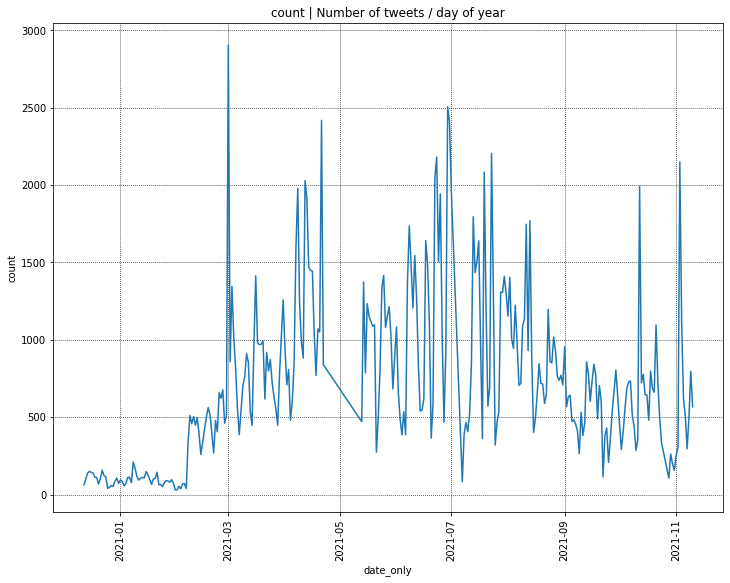

In [ ]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

## Pkot: Tweets / day of week

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


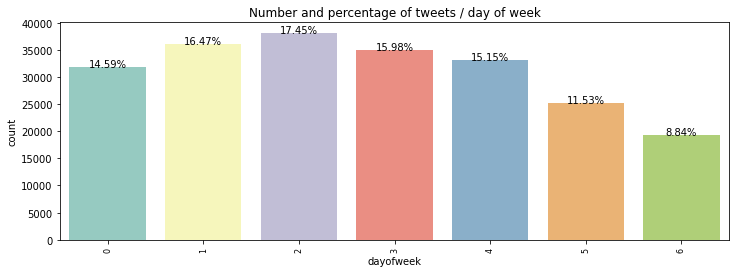

In [ ]:
plot_count("dayofweek", "tweets / day of week", tweets_df, size=3, ordered=False)

## Plot: Tweets / day of year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


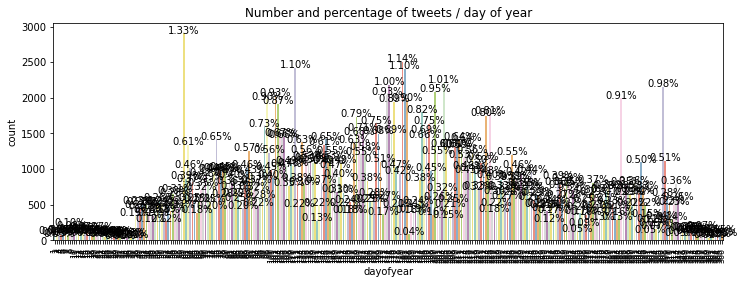

In [ ]:
plot_count("dayofyear", "tweets / day of year", tweets_df, size=3, ordered=False)

## Plot: Tweet/ Date

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


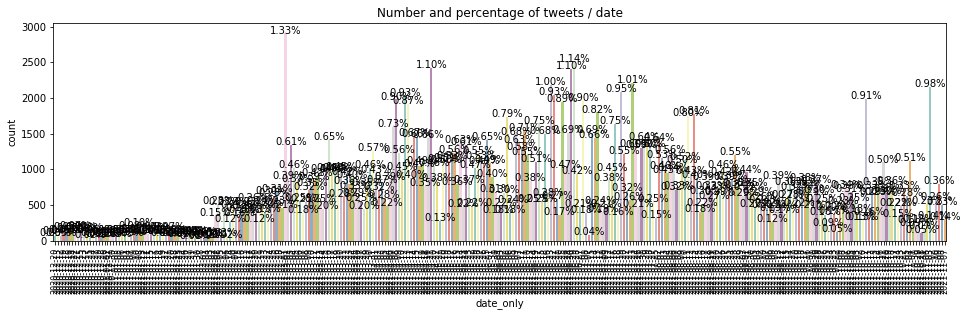

In [ ]:
plot_count("date_only", "tweets / date", tweets_df,size=4, ordered=False)

## PLot: tweets / hour

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


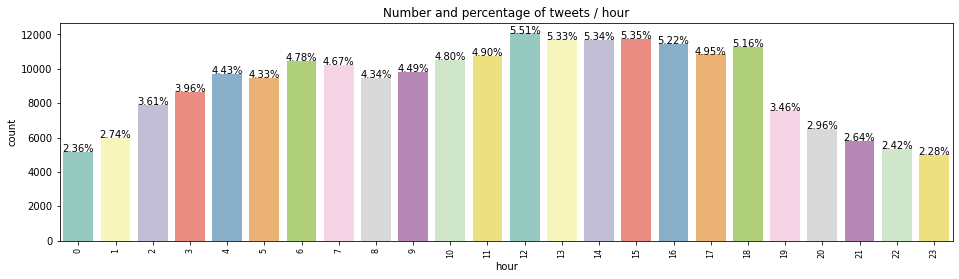

In [ ]:
plot_count("hour", "tweets / hour", tweets_df,size=4, ordered=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


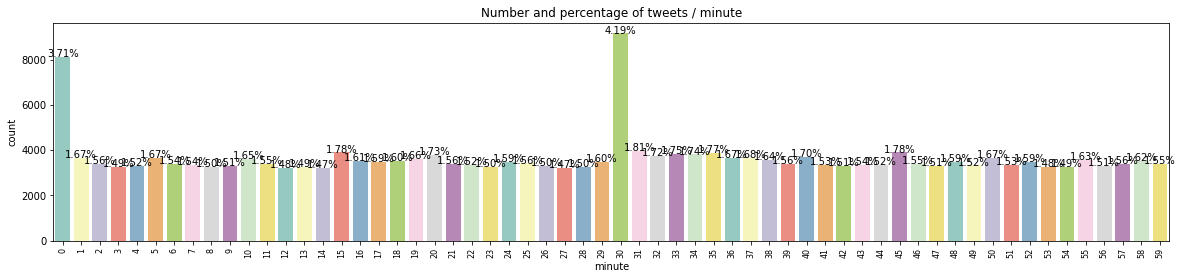

In [ ]:
plot_count("minute", "tweets / minute", tweets_df,size=5, ordered=False)

# Opinon and Sentiment Analysis- To do

# Vaccine wise Analysis- To Do

# References  
* 1. https://www.kaggle.com/amartyanambiar/covid-19-vaccine-sentitmental-analysis/notebook (used upto line 15)
* 2. https://www.kaggle.com/gpreda/explore-vaccines-tweets#Data-preparation (up to before Sentiment analysis, but have to fix time distribution plots)
* 3. https://towardsdatascience.com/sentiment-analysis-of-covid-19-vaccine-tweets-dc6f41a5e1af
------------
2nd Dataset

1. https://www.kaggle.com/filterjoe/world-covid-19-vaccines-complex-visualizations
2. https://www.kaggle.com/aliderakhshesh/time-series-with-ml